In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
import numba as nb

## Clenshaw-Curtis Grid


In [2]:
dim = 5
coeffs = np.ones(dim)*5
midpoint = np.ones(dim)*0.5
a = np.zeros(dim)
b = np.ones(dim)
grid = GaussLegendreGrid(a=a, b=b)
f = GenzDiscontinious(coeffs, midpoint)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 5
combiObject.perform_operation(minimum_level, maximum_level, f)
#combiObject.print_resulting_combi_scheme()
#combiObject.print_resulting_sparsegrid()

Combi scheme:
Cannot print combischeme of dimension > 2
Sparse Grid:
Cannot print sparse grid of dimension > 3
Time used (s):0.4674259070000062
Number of distinct points used during the refinement (StdCombi): 142143
Analytic Solution: 0.0002085270099729672 
Difference 1.9644263784786986e-05: 


([<sparseSpACE.ComponentGridInfo.ComponentGridInfo at 0x7f0366fd0490>,
 1.9644263784786986e-05,
 array([0.00018888]))

## Gauss-Legendre Grid

Combi scheme:
Cannot print combischeme of dimension > 2
Sparse Grid:


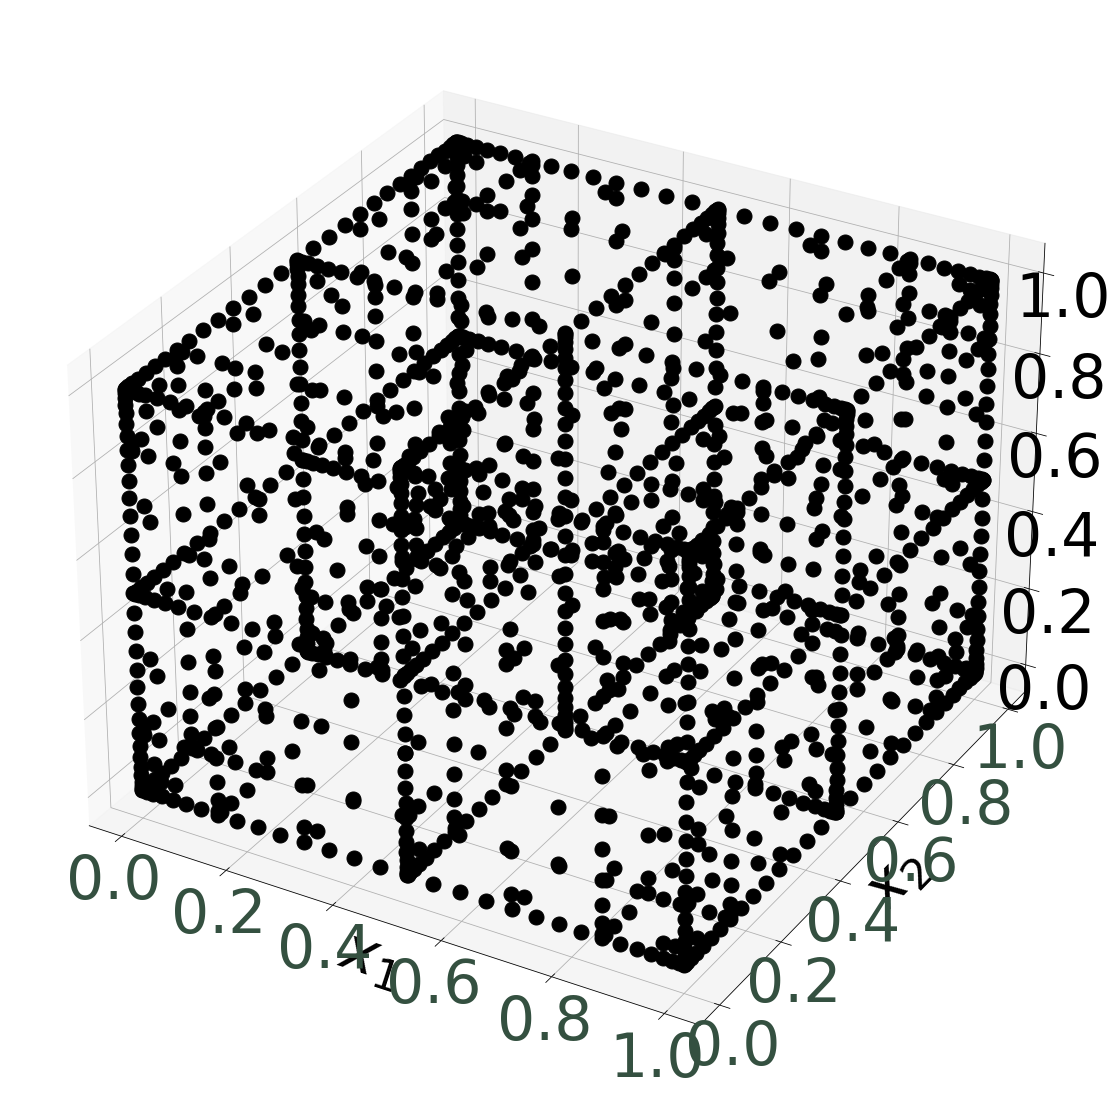

Time used (s):0.3826238759999683
Number of distinct points used during the refinement (StdCombi): 1505
Analytic Solution: -0.06235931799348836 
Difference 5.065392549852277e-16: 


([<sparseSpACE.ComponentGridInfo.ComponentGridInfo at 0x7f0365157190>,
 5.065392549852277e-16,
 array([-0.06235932]))

In [4]:
dim = 3
coeffs = np.ones(dim)
offset = 0.5
a = np.zeros(dim)
b = np.ones(dim)
grid = ClenshawCurtisGrid(a=a, b=b)
f = GenzOszillatory(coeffs=coeffs, offset=offset)
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation, log_level=log_levels.WARNING)
minimum_level = 1
maximum_level = 5
combiObject.perform_operation(minimum_level, maximum_level, f)

## Spatially Adaptive Combination

In [5]:
from sparseSpACE.spatiallyAdaptiveCell import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *
from sparseSpACE.GridOperation import *
#dimension of the problem
dim = 2
# define function to be integrated
coeffs = np.ones(dim)*5
#midpoint = np.ones(dim)*0.5
offset = 0.5
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b)
f = GenzOszillatory(coeffs, offset)
# plot function
#f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator=ErrorCalculatorSurplusCell()

# NEW! define operation which shall be performed in the combination technique
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution, print_level=0)

# define Cell refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b, operation=operation)

# the cell method does not have component grids and therefore the sparse grid is printed twice per iteration!
# performing the spatially adaptive refinement with the Cell method
adaptiveCombiInstanceCell.performSpatiallyAdaptiv(2, 2, errorOperator, 10**-2, do_plot=False, print_output=False)

print("Number of points used in refinement:", adaptiveCombiInstanceCell.get_total_num_points())

split dimension 0
split dimension 0
split dimension 1
split dimension 1
Current number of function evaluations 25
combiintegral: -0.012198752054543625
Finished refinement
Refined 3 times
Current number of function evaluations 37
combiintegral: -0.0409270395022066
Finished refinement
Refined 6 times
Current number of function evaluations 57
combiintegral: 0.005492892685155385
Finished refinement
Refined 3 times
Current number of function evaluations 61
combiintegral: -0.0041708111627740355
Finished refinement
Refined 4 times
Current number of function evaluations 65
combiintegral: -0.015042301876793474
Finished refinement
Refined 12 times
Current number of function evaluations 92
combiintegral: -0.023720289446461165
Finished refinement
Refined 24 times
Current number of function evaluations 138
combiintegral: -0.009698165947431822
Finished refinement
Refined 12 times
Current number of function evaluations 149
combiintegral: -0.012617292331907722
Finished refinement
Refined 16 times
Curr

In [6]:
import sys
sys.path.append("..")

from src.py.option import sde_body, EuropeanOption, AsianOption


# Valuation Examples:  
## European Call Option

In [82]:
def phi(x,sigma,mu,T,K, axis=1):
    payoffcoarse=np.exp(-mu * T)* np.maximum(x - K, 0.) 
    return payoffcoarse
eop = EuropeanOption()
dim = 1
eop_payout = lambda x: phi(eop.S_t(x), eop.sigma, eop.r, eop.T, eop.K)
sparse_payout = CustomFunction(eop_payout)

a = np.zeros(dim)
b = np.ones(dim)
grid = GaussLegendreGrid(a=a, b=b)
f = sparse_payout

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution=eop.scholes_call())
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 8
combiObject.perform_operation(minimum_level, maximum_level, f)

Combi scheme:
Cannot print combischeme of dimension > 2
Sparse Grid:
Cannot print sparse grid of dimension > 3
Time used (s):0.059047807999377255
Number of distinct points used during the refinement (StdCombi): 257
Analytic Solution: 13.269676584660886 
Difference 0.0001657712862499494: 


([<sparseSpACE.ComponentGridInfo.ComponentGridInfo at 0x7f0366e8a820>],
 0.0001657712862499494,
 array([13.26951081]))

## Asian Geometric Call Option

In [8]:
aop = AsianOption(d=4)
dim = aop.d
aop_payout = lambda x: aop.payout_func(aop.S_t(x))
sparse_payout = CustomFunction(aop_payout)
a = np.zeros(dim)
b = np.ones(dim)

grid = ClenshawCurtisGrid(a=a+aop.epsilon, b=b-aop.epsilon)
f = sparse_payout

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution=aop.scholes_call())
combiObject = StandardCombi(a, b, operation=operation, n_jobs=16)
minimum_level = 1
maximum_level = 3
combiObject.perform_operation(minimum_level, maximum_level, f)

Combi scheme:
Cannot print combischeme of dimension > 2
Sparse Grid:
Cannot print sparse grid of dimension > 3
Time used (s):0.1998544539999898
Number of distinct points used during the refinement (StdCombi): 945
Analytic Solution: 8.327943911732412 
Difference 2.6624611907053364: 


([<sparseSpACE.ComponentGridInfo.ComponentGridInfo at 0x7f0366e74a90>,
 2.6624611907053364,
 array([10.9904051]))

In [9]:
combiObject.grid.integrator??

Signature:  
combiObject.grid.integrator(
    f: sparseSpACE.Function.Function,
    numPoints: Sequence[int],
    start: Sequence[float],
    end: Sequence[float],
) -> Sequence[float]
Type:        IntegratorArbitraryGridScalarProduct
String form: <sparseSpACE.Integrator.IntegratorArbitraryGridScalarProduct object at 0x7f0366e74790>
File:        ~/coding/sparseSpACE/sparseSpACE/Integrator.py
Source:     
class IntegratorArbitraryGridScalarProduct(IntegratorBase):
    def __init__(self, grid):
        self.grid = grid #type: Grid

    def __call__(self, f: Function, numPoints: Sequence[int], start: Sequence[float], end: Sequence[float]) -> Sequence[float]:
        points, weights = self.grid.get_points_and_weights()
        f_values = f(points)

        if len(f_values) == 0:
            assert len(points) == 0
            assert len(weights) == 0
            return 0.0
        else:
            return np.inner(f_values.T, weights)


## Optimizing evaluate_levelvec

In [11]:
def optimized_level_eval(combiObject, lmin, lmax, f):
    combiObject.set_combi_parameters(lmin, lmax)
    combiObject.operation.initialize()
    # iterate over all component_grids and perform operation
    for component_grid in combiObject.scheme:  # iterate over component grids
        print(component_grid.__dict__)
    #     combiObject.operation.evaluate_levelvec(component_grid)
    # # potential post processing after processing all component grids
    # combiObject.operation.post_processing()                                           
    # # get result of combination
    # combi_result = combiObject.operation.get_result()
    # return combi_result

#%time optimized_level_eval(combiObject, minimum_level, maximum_level, f)
optimized_level_eval(combiObject, minimum_level, maximum_level, f)

{'levelvector': array([1, 1, 1, 3]), 'coefficient': 1.0}
{'levelvector': array([1, 1, 2, 2]), 'coefficient': 1.0}
{'levelvector': array([1, 1, 3, 1]), 'coefficient': 1.0}
{'levelvector': array([1, 2, 1, 2]), 'coefficient': 1.0}
{'levelvector': array([1, 2, 2, 1]), 'coefficient': 1.0}
{'levelvector': array([1, 3, 1, 1]), 'coefficient': 1.0}
{'levelvector': array([2, 1, 1, 2]), 'coefficient': 1.0}
{'levelvector': array([2, 1, 2, 1]), 'coefficient': 1.0}
{'levelvector': array([2, 2, 1, 1]), 'coefficient': 1.0}
{'levelvector': array([3, 1, 1, 1]), 'coefficient': 1.0}
{'levelvector': array([1, 1, 1, 2]), 'coefficient': -3.0}
{'levelvector': array([1, 1, 2, 1]), 'coefficient': -3.0}
{'levelvector': array([1, 2, 1, 1]), 'coefficient': -3.0}
{'levelvector': array([2, 1, 1, 1]), 'coefficient': -3.0}
{'levelvector': array([1, 1, 1, 1]), 'coefficient': 3.0}
